In [8]:
%plot --format svg

# Errors in Numerical Modeling

## 1 - Roundoff  
## 2 - Truncation

|Question|	Answered Right|	Answered Wrong	|Total % Right
|-----------------------------|---|---|---|
|What is the 32-bit representation of e "exp(1)"?	|47|	35|	57.3%|
|The command ">10+eps-10" results in:	|32|	52	|38.1%|
|Using a first-order Taylor series expansion and a time step, h, of 0.1 s, the order of expected truncation error is:	|49	|33|	59.8%|

In [6]:
fprintf('%1.64f',eps)

0.0000000000000002220446049250313080847263336181640625000000000000


# 1- Roundoff

## Just storing a number in a computer requires rounding

1. digital representation of a number is rarely exact

2. arithmetic (+,-,/,\*) causes roundoff error

In [35]:
fprintf('%1.20f\n',double(pi)) % 64-bit
fprintf('%1.20f\n',single(pi)) % 32-bit

3.14159265358979311600
3.14159274101257324219


In [36]:
fprintf('realmax = %1.20e\n',realmax)
fprintf('realmin = %1.20e\n',realmin)
fprintf('maximum relative error = %1.20e\n',eps)


realmax = 1.79769313486231570815e+308
realmin = 2.22507385850720138309e-308
maximum relative error = 2.22044604925031308085e-16


## Machine epsilon

Smallest number that can be added to 1 and change the value in a computer

In [41]:
s=1;
for i=1:10000
    s=s+eps/2;
end
s-1
10000*eps/2

ans = 0
ans =    1.1102e-12


# 2- Truncation error
## Freefall is example of "truncation error"
### Truncation error results from approximating exact mathematical procedure

We approximated the derivative as $\delta v/\delta t\approx\Delta v/\Delta t$

Can reduce error by decreasing step size -> $\Delta t$=`delta_time`

## Truncation error as a Taylor series 

Taylor series:
$f(x)=f(a)+f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^{2}+\frac{f'''(a)}{3!}(x-a)^{3}+...$

We can approximate the next value in a function by adding Taylor series terms:

|Approximation | formula |
|---|-------------------------|
|$0^{th}$-order | $f(x_{i+1})=f(x_{i})+R_{1}$ |
|$1^{st}$-order | $f(x_{i+1})=f(x_{i})+f'(x_{i})h+R_{2}$ |
|$2^{nd}$-order | $f(x_{i+1})=f(x_{i})+f'(x_{i})h+\frac{f''(x_{i})}{2!}h^{2}+R_{3}$|
|$n^{th}$-order | $f(x_{i+1})=f(x_{i})+f'(x_{i})h+\frac{f''(x_{i})}{2!}h^{2}+...\frac{f^{(n)}}{n!}h^{n}+R_{n}$|

Where $R_{n}=O(h^{n+1})$ is the error associated with truncating the approximation at order $n$.

![3](https://media.giphy.com/media/xA7G2n20MzTOw/giphy.gif)

$n^{th}$-order approximation equivalent to 
an $n^{th}$-order polynomial. 

# Thanks

# Freefall Model (revisited)
## Octave solution (will run same on Matlab)

## Create function called `freefall.m`

Define time from 0 to 12 seconds with `N` timesteps 
function defined as `freefall`

m=60 kg, c=0.25 kg/m

### Set default values in Octave for linewidth and text size

In [7]:
set (0, "defaultaxesfontsize", 18)
set (0, "defaulttextfontsize", 18) 
set (0, "defaultlinelinewidth", 4)

## Freefall example

Estimated the function with a $1^{st}$-order approximation, so 

$v(t_{i+1})=v(t_{i})+v'(t_{i})(t_{i+1}-t_{i})+R_{1}$

$v'(t_{i})=\frac{v(t_{i+1})-v(t_{i})}{t_{i+1}-t_{i}}-\frac{R_{1}}{t_{i+1}-t_{i}}$

$\frac{R_{1}}{t_{i+1}-t_{i}}=\frac{v''(\xi)}{2!}(t_{i+1}-t_{i})$

or the truncation error for a first-order Taylor series approximation is

$R_{1}=O(\Delta t^{2})$


In [9]:
function [v_analytical,v_terminal,t]=freefall(N)
    % help file for freefall.m
    % N is number of timesteps between 0 and 12 sec
    % v_an...
    t=linspace(0,12,N)';
    c=0.25; m=60; g=9.81; v_terminal=sqrt(m*g/c);

    v_analytical = v_terminal*tanh(g*t/v_terminal);
    v_numerical=zeros(length(t),1);
    delta_time =diff(t);
    for i=1:length(t)-1
        v_numerical(i+1)=v_numerical(i)+(g-c/m*v_numerical(i)^2)*delta_time(i);
    end
    % Print values near 0,2,4,6,8,10,12 seconds
    indices = round(linspace(1,length(t),7));
    fprintf('time (s)|vel analytical (m/s)|vel numerical (m/s)\n')
    fprintf('-----------------------------------------------\n')
    M=[t(indices),v_analytical(indices),v_numerical(indices)];
    fprintf('%7.1f | %18.2f | %15.2f\n',M(:,1:3)');
    plot(t,v_analytical,'-',t,v_numerical,'o-')
end
    

time (s)|vel analytical (m/s)|vel numerical (m/s)
-----------------------------------------------
    0.0 |               0.00 |            0.00
    2.0 |              18.62 |           18.62
    4.0 |              32.46 |           32.46
    6.0 |              40.64 |           40.65
    8.0 |              44.85 |           44.85
   10.0 |              46.85 |           46.85
   12.0 |              47.77 |           47.77


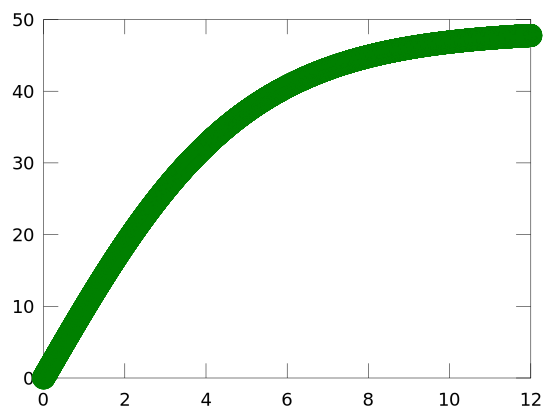

In [13]:
[v_analytical,v_terminal,t]=freefall(10000);

In [15]:
(12/10000)^2

ans =    1.4400e-06
